# Stress Detection using Wearable Devices to Enhance Well-Being | Data Analysis

ID Tim: CC25-CR439

## Informasi Dataset

🧠 **Ringkasan**

WESAD (WEarable Stress And Affect Detection) adalah dataset multimodal yang digunakan untuk mendeteksi stres dan emosi menggunakan perangkat wearable. Data dikumpulkan dari dua perangkat: RespiBAN (dikenakan di dada) dan Empatica E4 (dikenakan di pergelangan tangan). Dataset ini dirancang untuk mendukung penelitian dalam bidang affective computing, kesehatan mental, dan machine learning.

👨‍🔬 **Informasi Umum**

- Jumlah subjek: 17 (data dari 2 subjek tidak tersedia karena malfungsi sensor)
- Perangkat:
    - RespiBAN Professional (sensor di dada, sampling 700 Hz)
    - Empatica E4 (sensor di pergelangan tangan, bermacam-macam sampling rate)
- File utama:
    - SX_readme.txt: deskripsi per subjek
    - SX_quest.csv: informasi protokol dan kuesioner
    - SX_respiban.txt: data mentah dari RespiBAN
    - SX_E4_Data (Folder): data mentah dari Empatica E4
    - SX.pkl: data yang telah disinkronisasi

🧪 **Data Sensor**

**RespiBAN (Dada)**
- Sampling rate: 700hz
- Sensor: ACC (accelerometer), ECG, EDA, EMG, RESP, TEMP
- Format: file .txt dengan 10 kolom (1 = nomor baris, 2 = abaikan, 3-10 = data sensor)

**Empatica E4 (Pergelangan Tangan)**
- Sensor: ACC (accelerometer), BVP (blood volume pulse), EDA (electrodermal activity), TEMP (temperatur)
- Sampling rate bervariasi:
    - ACC.csv: 32 Hz (akselerometer 3 sumbu, satuan 1/64g)
    - BVP.csv: 64 Hz (photoplethysmograph/PPG)
    - EDA.csv: 4 Hz (μS)
    - TEMP.csv: 4 Hz (°C)

🏷️ **Label dan Ground Truth**
- Tersedia label eksperimen:
    - 0 = tidak terdefinisi/transien
    - 1 = baseline
    - 2 = stres
    - 3 = senang (amusement)
    - 4 = meditasi
- Kuesioner self-report: PANAS, STAI, SAM, SSSQ

---

**Pada projek ini hanya akan digunakan data dari perangkat yang digunakan pada pergelangan tangan (Empatica E4), dan data dari sensor EDA akan ditinggalkan, hal ini dilakukan untuk sebisa mungkin mendekati kemampuan yang dimiliki oleh smartwatch konvensional**

## Import library

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Preparation

In [2]:
dataset_dir = "/kaggle/input/wesad-wearable-stress-affect-detection-dataset/WESAD/"

## Data Loading

Pertama-tama akan dimuat data dari satu subjek terlebih dahulu (subjek 2) untuk nantinya dilihat perbedaan antara menggunakan data dari satu subjek dibandingkan dengan menggabungkan data dari semua subjek

In [3]:
# memuat data subjek 2
with open(dataset_dir+'S2/S2.pkl', 'rb') as f:
    s2_data = pickle.load(f, encoding='latin1')

type(s2_data)

dict

In [4]:
# melihat daftar keys yang ada pada data dan melihat isinya
print(s2_data.keys())

for key in s2_data.keys():
    print(s2_data[key])

dict_keys(['signal', 'label', 'subject'])
{'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682]

In [5]:
# melihat keys pada 'signal' dan melihat isinya
print(s2_data['signal'].keys())

for key in s2_data['signal'].keys():
    print(s2_data['signal'][key])

dict_keys(['chest', 'wrist'])
{'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682],
       [-1.12457275]

In [6]:
s2_data['signal']['wrist']['ACC']

array([[ 62., -21., 107.],
       [ 66.,  13.,  53.],
       [ 41.,   9.,  15.],
       ...,
       [ 41.,  25.,  11.],
       [ 39.,  27.,  22.],
       [ 56.,  26.,  10.]])

In [7]:
# mengubah data subjek 2 ke dataframe

sampling_rate = {'ACC' : 32, 'BVP' : 64,'TEMP' : 4, 'LABEL' : 700, 'TARGET' : 4}

# mengambil data sinyal berdasarkan sensor terlebih dahuluu
s2_wrist = s2_data['signal']['wrist']
s2_acc = s2_wrist['ACC']
s2_bvp = s2_wrist['BVP']
s2_temp = s2_wrist['TEMP']

# melakukan down sampling agar jumlah data/baris pada setiap sensor sama
duration_sec = len(s2_temp) / sampling_rate['TEMP'] # mengambil jumlah detik
new_len = int(duration_sec * sampling_rate['TARGET'])
time_index = pd.timedelta_range(start='0s', periods=new_len, freq=f'{int(1000/sampling_rate["TARGET"])}ms')

# fungsi untuk melakukan resampling
def resample_signal(signal, original_fs, target_fs, agg='mean'):
    factor = int(original_fs / target_fs)
    trimmed_len = (len(signal) // factor) * factor
    signal_trimmed = signal[:trimmed_len].reshape(-1, factor, signal.shape[1])
    if agg == 'mean':
        return signal_trimmed.mean(axis=1)
    else:
        raise ValueError("Unsupported aggregation method.")

# down sampling
acc_down = resample_signal(s2_acc, sampling_rate['ACC'], sampling_rate['TARGET'])
bvp_down = resample_signal(s2_bvp, sampling_rate['BVP'], sampling_rate['TARGET'])
temp_down = s2_temp[:len(time_index)]

# Create DataFrames
df_acc = pd.DataFrame(acc_down, columns=['ACC_x', 'ACC_y', 'ACC_z'])
df_bvp = pd.DataFrame(bvp_down, columns=['BVP'])
df_temp = pd.DataFrame(temp_down, columns=['TEMP'])

# combine
df_combined = pd.concat([df_acc, df_bvp, df_temp], axis=1)
df_combined['Time'] = time_index

In [8]:
# mengambil data label
s2_label = s2_data['label']

def downsample_labels(labels, factor):
    trimmed_len = (len(labels) // factor) * factor
    labels = labels[:trimmed_len].reshape(-1, factor)
    mode_labels = [np.bincount(row).argmax() for row in labels]
    return np.array(mode_labels)

label_final = downsample_labels(s2_label, int(sampling_rate['LABEL']/sampling_rate['TARGET']))

In [9]:
df_final = df_combined.iloc[:len(label_final)].copy()
df_final['label'] = label_final

## Data Assessing

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24316 entries, 0 to 24315
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   ACC_x   24316 non-null  float64        
 1   ACC_y   24316 non-null  float64        
 2   ACC_z   24316 non-null  float64        
 3   BVP     24316 non-null  float64        
 4   TEMP    24316 non-null  float64        
 5   Time    24316 non-null  timedelta64[ns]
 6   label   24316 non-null  int64          
dtypes: float64(5), int64(1), timedelta64[ns](1)
memory usage: 1.3 MB


- Terdapat 7 kolom dan 24316 baris data pada dataset
- Tidak ada missing value pada dataset
- 5 Kolom memiliki tipe data float, 1 timedelta, dan 1 int

In [11]:
# melihat data
df_final.head()

,ACC_x,ACC_y,ACC_z,BVP,TEMP,Time,label
0,53.000,9.625,43.625,6.269375,35.41,0 days 00:00:00,0
1,62.500,21.500,0.125,45.905000,35.41,0 days 00:00:00.250000,0
2,44.500,6.000,38.000,54.358750,35.41,0 days 00:00:00.500000,0
3,48.750,17.125,37.750,21.695625,35.41,0 days 00:00:00.750000,0
4,55.875,23.875,-1.500,-209.836875,35.41,0 days 00:00:01,0


In [12]:
# melihat statistik data
df_final.describe()

,ACC_x,ACC_y,ACC_z,BVP,TEMP,Time,label
count,24316.000000,24316.000000,24316.000000,24316.000000,24316.000000,24316,24316.00000
mean,39.701452,-0.407381,18.990526,-0.000427,34.386945,0 days 00:50:39.375000,1.21237
std,18.946550,33.094480,24.717799,62.669446,1.045340,0 days 00:29:14.892227222,1.60663
min,-51.375000,-95.125000,-71.750000,-631.375000,32.310000,0 days 00:00:00,0.00000
25%,21.000000,-12.000000,8.750000,-16.288750,33.680000,0 days 00:25:19.687500,0.00000
50%,43.750000,5.500000,17.000000,1.747812,34.250000,0 days 00:50:39.375000,0.00000
75%,56.875000,22.750000,36.375000,16.184062,35.410000,0 days 01:15:59.062500,2.00000
max,94.000000,61.750000,86.625000,533.926250,35.970000,0 days 01:41:18.750000,7.00000


Untuk mengetahui apakah statistik di atas valid atau tidak (dalam kata lain apakah data bersih atau kotor), kita harus mengetahui rentang nilai valid dari output sensor, data tersebut bisa didapatkan dari petunjuk penggunaan Empatica E4 [di sini](https://box.empatica.com/documentation/20141119_E4_TechSpecs.pdf). Dari petunjuk penggunaan tersebut, berikut adalah detailnya:
- Accelerometer (ACC):
    - Rentang [-2g, 2g], karena data direkam dalam satuan 1/64g, maka rentang nilai mentahnya adalah [-128, 128]
- Blood Volume Pulse (BVP)--data didapatkan dari sensor PPG:
    - Sampling rate: 64 Hz
    - Resolusi output: 0,9 nW / digit
    - Unit: Tidak secara eksplisit didefinisikan dalam satuan fisik standar
- Temperature (TEMP)
    - Rentang [-40, 115] (dalam celcius) untuk suhu kulit, dengan akurasi +-0,2 pada suhu kulit 36-39
 
Kesimpulan
- ACC: Valid jika berada dalam [-128, 128]
- BVP: Tidak memiliki rentang absolut
- TEMP: Valid jika berada dalam [-40, 115]

---

Data statistik deskriptif pada dataset:
- ACC_x
    - min: -51.375
    - max: 94.000
- ACC_y
    - min: -95.125
    - max: 61.750
- ACC_z
    - min: -71.750000
    - max: 86.625
- BVP
    - min: -631.375
    - max: 533.926
- TEMP
    - min: 32.310
    - max: 35.970
- Time
    - Secara keseluruhan rekaman data berdurasi 1 jam 41 menit 18 detik

**Dari data di atas maka kita dapat menarik kesimpulan bahwa data yang kita miliki adalah valid**

In [13]:
def create_boxplot(df, exclude_cols=None):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Remove excluded columns
    if exclude_cols is not None:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    if not numeric_cols:
        print("No numeric columns to plot.")
        return

    fig, ax = plt.subplots(len(numeric_cols), 1, figsize=(12, 6 * len(numeric_cols)))

    if len(numeric_cols) == 1:
        ax = [ax]

    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=ax[i], orient='h')
        ax[i].set_title(f"{col} boxplot")
        
    plt.show()

def create_lineplot(df, exclude_cols=None, sample_size=None):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Remove excluded columns
    if exclude_cols is not None:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    if not numeric_cols:
        print("No numeric columns to plot.")
        return

    # Optional sampling for performance
    if sample_size is not None and len(df) > sample_size:
        df = df.iloc[:sample_size]

    fig, ax = plt.subplots(len(numeric_cols), 1, figsize=(12, 4 * len(numeric_cols)))

    if len(numeric_cols) == 1:
        ax = [ax]

    for i, col in enumerate(numeric_cols):
        sns.lineplot(data=df, x=df.index, y=col, ax=ax[i])
        ax[i].set_title(f"{col} line plot")
        ax[i].set_xlabel("Index")
        ax[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

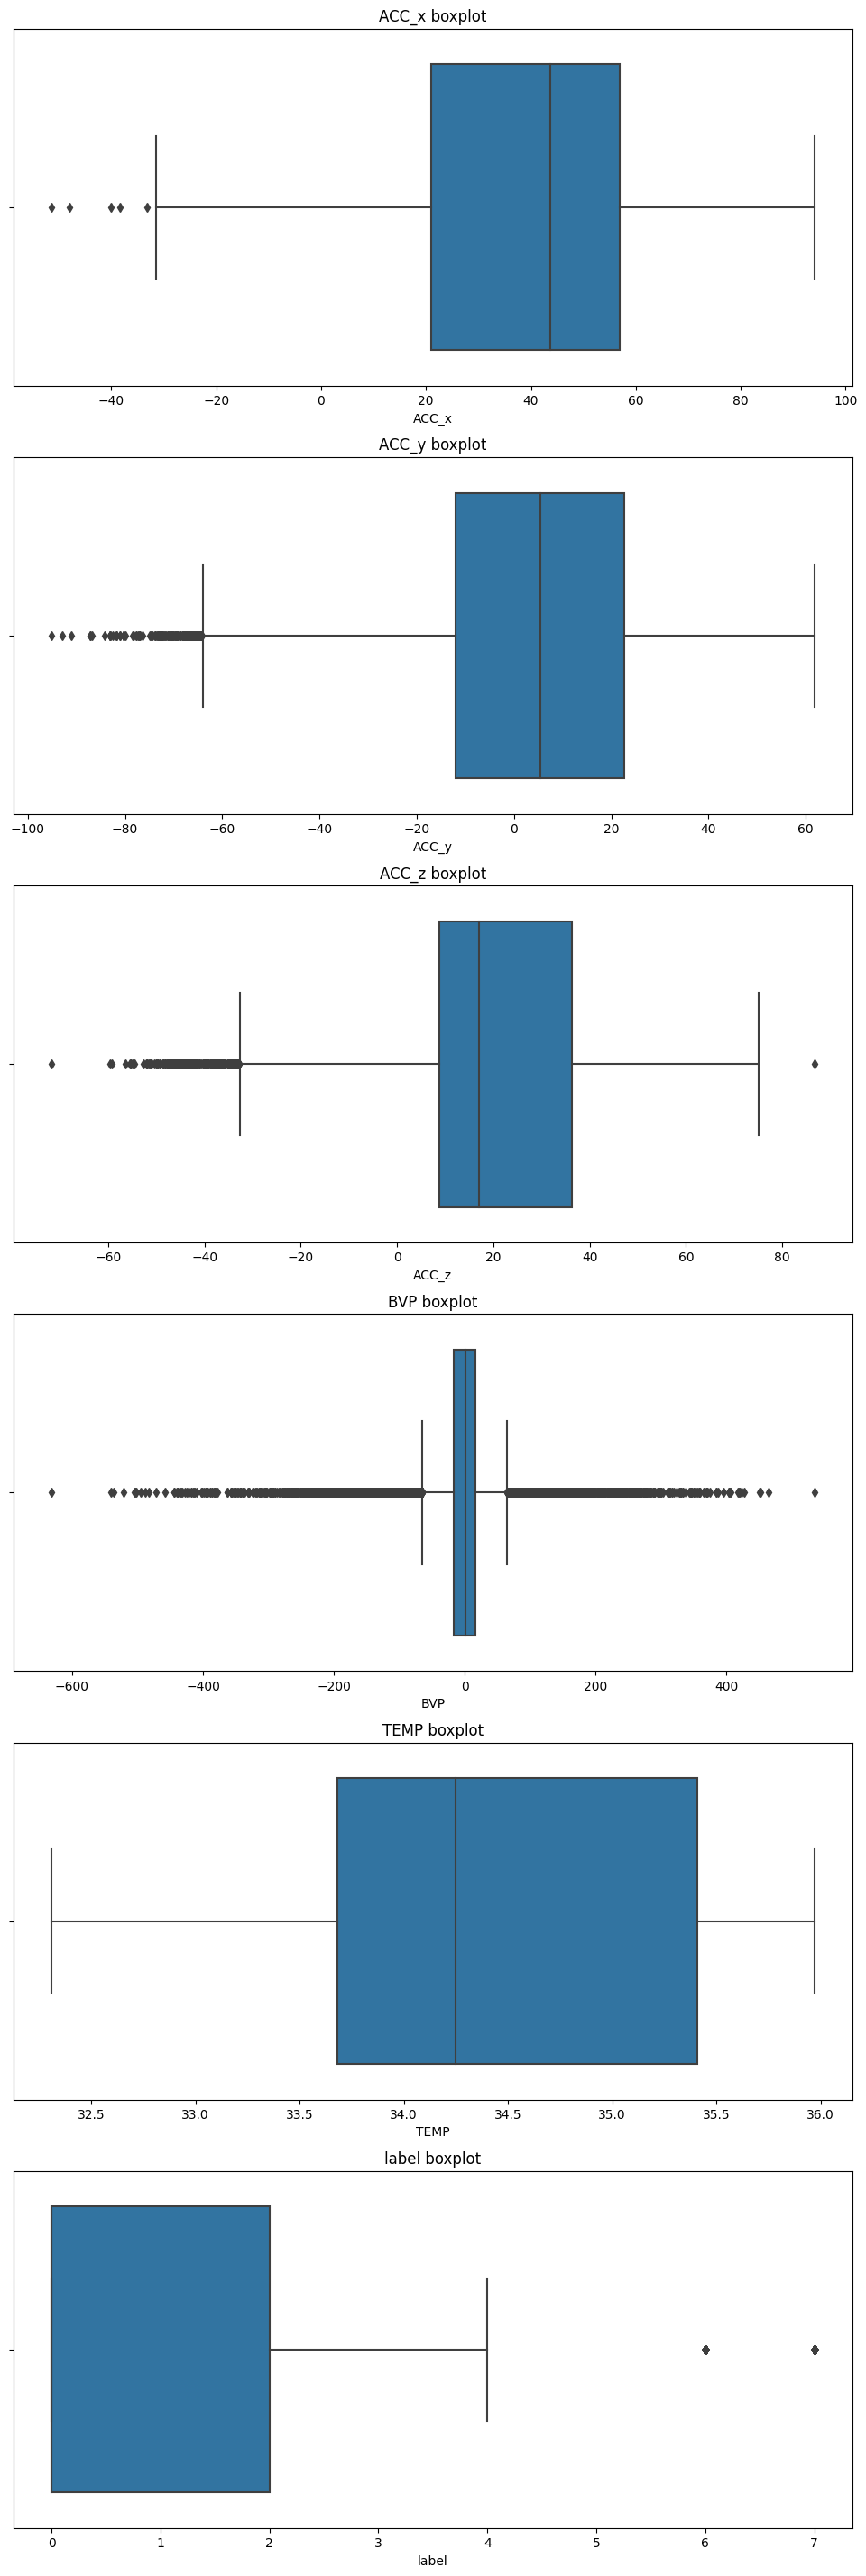

In [14]:
create_boxplot(df_final, ['Time'])

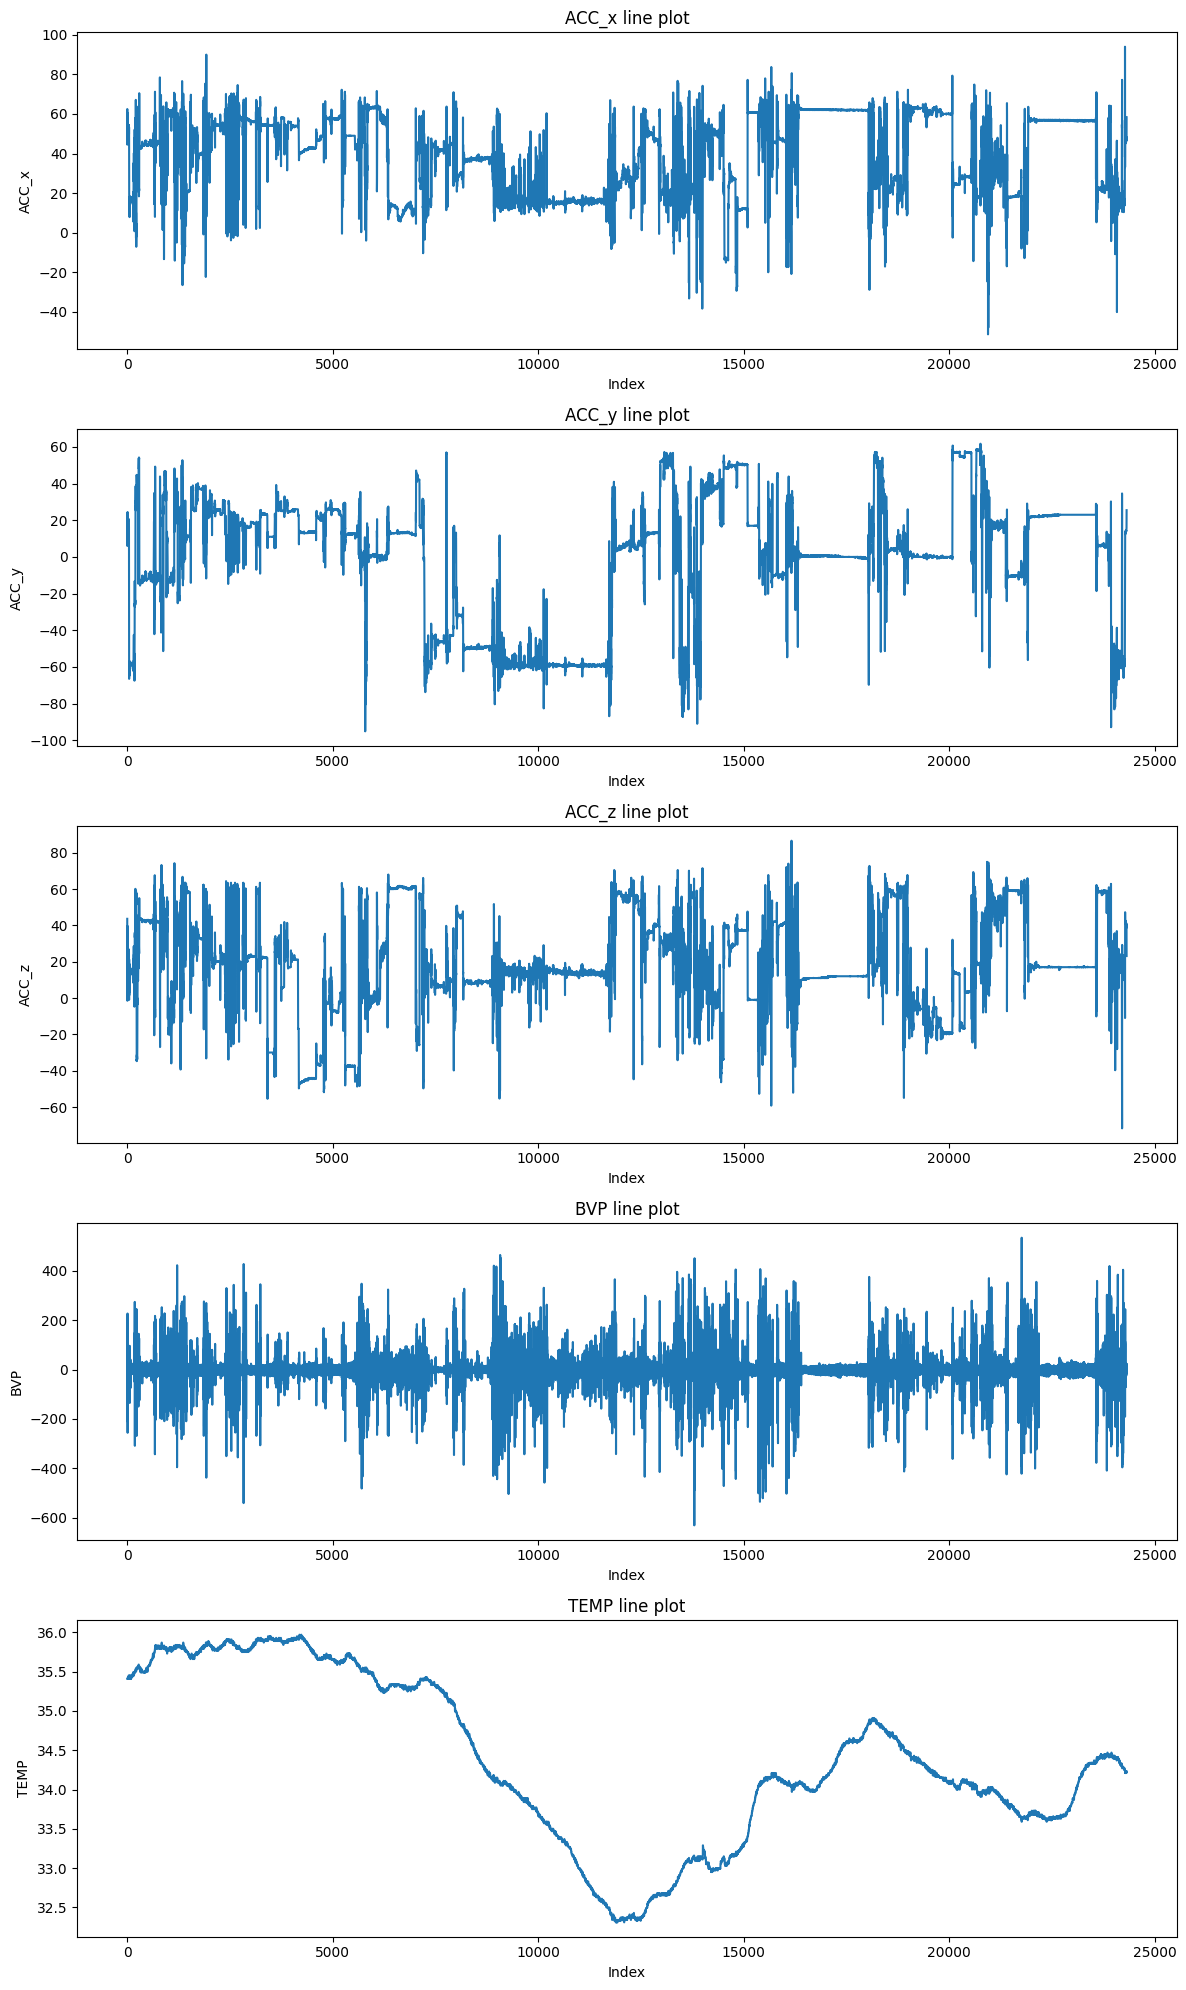

In [15]:
create_lineplot(df_final, ['Time', 'label'])

Dari grafik di atas, kita dapat melihat bahwa terdapat masih banyak outlier khusunya pada data dari sensor BVP dan ACC, namun karena data didapatkan langsung dari sensor dan masih berada dalam rentang yang valid, maka ini bukanlah suatu kesalahan.

## Data Cleaning

Seperti yang diketahui dari tahap data assessing, semua data telah berada pada rentang yang valid, tidak ada baris dengan missing value, ataupun perbedaan tipe data dari yang seharusnya, maka sebenernya data yang kita miliki sudah terbilang bersih, namun kita masih bisa melakukan satu hal yaitu mengubah nama kolom menjadi lowercase agar menjadi lebih standar dan mudah dioperasikan.

In [16]:
# mengubah nama kolom ke lowercase
df_final.columns = df_final.columns.str.lower()

In [17]:
# memastikan nama kolom telah diubah ke lowercase
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24316 entries, 0 to 24315
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   acc_x   24316 non-null  float64        
 1   acc_y   24316 non-null  float64        
 2   acc_z   24316 non-null  float64        
 3   bvp     24316 non-null  float64        
 4   temp    24316 non-null  float64        
 5   time    24316 non-null  timedelta64[ns]
 6   label   24316 non-null  int64          
dtypes: float64(5), int64(1), timedelta64[ns](1)
memory usage: 1.3 MB


Sebenernya kita masih bisa melakukan cleaning atau lebih tepatnya preprocessing, seperti scaling data menggunakan StandardScaler ataupun MinMaxScaler, namun hal ini lebih tepat dilakukan pada tahap pengembangan model machine learning.

## Exploratory Data Analysis

### Melihat distribusi label

In [18]:
# melihat distribusi label menggunakan angka
df_final['label'].value_counts()

label
0    12244
1     4576
4     3072
2     2460
3     1448
6      260
7      256
Name: count, dtype: int64

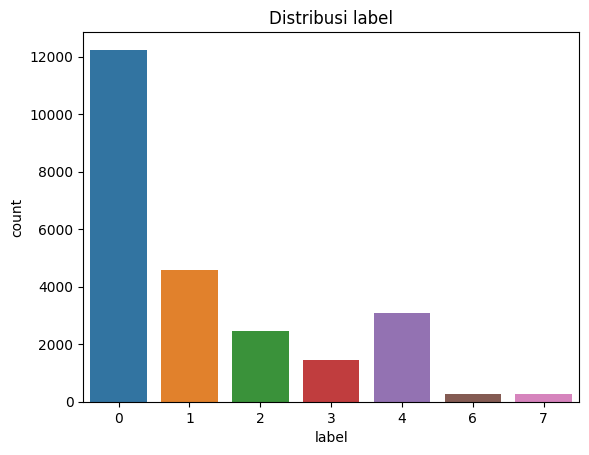

In [19]:
# membuat count plot untuk melihat distribusi label
sns.countplot(df_final,x=df_final['label'])
plt.title("Distribusi label")
plt.show()

**Insight**

Dari grafik di atas kita dapat melihat bahwa status 0 (not defined/transient) adalah yang paling banyak, diikuti dengan status 1 (baseline), 4 (meditation), 2 (stress), dan 3 (amusement), status 6 & 7 dapat dihiraukan.

### Melihat statistik dari sensor untuk setiap label

#### Status 0 (not defined/transient)

In [20]:
df_final[df_final['label'] == 0].describe()

,acc_x,acc_y,acc_z,bvp,temp,time,label
count,12244.000000,12244.000000,12244.000000,12244.000000,12244.000000,12244,12244.0
mean,34.421145,-1.378706,28.076956,-0.004280,34.199835,0 days 00:52:57.347557987,0.0
std,18.415925,33.582146,23.890441,74.536823,1.022204,0 days 00:27:10.519895634,0.0
min,-51.375000,-92.875000,-71.750000,-631.375000,32.310000,0 days 00:00:00,0.0
25%,18.625000,-17.781250,9.000000,-19.859219,33.230000,0 days 00:31:49.187500,0.0
50%,36.250000,3.750000,28.375000,1.795625,34.210000,0 days 00:55:54.375000,0.0
75%,48.281250,18.000000,49.250000,20.305781,35.250000,0 days 01:15:10.562500,0.0
max,94.000000,61.750000,86.625000,533.926250,35.870000,0 days 01:41:18.750000,0.0


#### Status 1 (baseline)

In [21]:
df_final[df_final['label'] == 1].describe()

,acc_x,acc_y,acc_z,bvp,temp,time,label
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576,4576.0
mean,48.897181,18.493854,6.488363,0.007968,35.786259,0 days 00:14:38.375000,1.0
std,12.344719,10.863977,30.924489,54.240750,0.108391,0 days 00:05:30.280436397,0.0
min,-26.500000,-95.125000,-55.500000,-541.275000,35.500000,0 days 00:05:06.500000,1.0
25%,44.000000,13.000000,-28.968750,-14.826875,35.710000,0 days 00:09:52.437500,1.0
50%,53.500000,20.000000,19.750000,1.843125,35.810000,0 days 00:14:38.375000,1.0
75%,56.250000,25.500000,24.906250,14.272656,35.890000,0 days 00:19:24.312500,1.0
max,90.000000,52.750000,66.750000,427.279375,35.970000,0 days 00:24:10.250000,1.0


#### Status 2 (stress)

In [22]:
df_final[df_final['label'] == 2].describe()

,acc_x,acc_y,acc_z,bvp,temp,time,label
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460,2460.0
mean,17.062856,-58.549898,13.665854,0.048299,33.442699,0 days 00:43:00.875000,2.0
std,4.802520,2.751361,3.289121,61.041144,0.462591,0 days 00:02:57.571288501,0.0
min,8.500000,-82.625000,-16.250000,-504.448125,32.570000,0 days 00:37:53.500000,2.0
25%,15.125000,-59.375000,13.000000,-16.445156,33.050000,0 days 00:40:27.187500,2.0
50%,15.875000,-59.000000,14.000000,0.835937,33.500000,0 days 00:43:00.875000,2.0
75%,17.000000,-58.750000,15.000000,17.315313,33.840000,0 days 00:45:34.562500,2.0
max,60.375000,-17.625000,29.125000,358.394375,34.110000,0 days 00:48:08.250000,2.0


#### Status 3 (amusement)

In [23]:
df_final[df_final['label'] == 3].describe()

,acc_x,acc_y,acc_z,bvp,temp,time,label
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448,1448.0
mean,51.137258,16.603419,-7.925414,0.001588,34.191160,0 days 01:22:24.375000,3.0
std,16.136967,25.653978,11.385627,37.433941,0.120436,0 days 00:01:44.536476887,0.0
min,-2.500000,-1.375000,-30.625000,-362.291250,34.000000,0 days 01:19:23.500000,3.0
25%,28.250000,0.000000,-17.656250,-14.073438,34.090000,0 days 01:20:53.937500,3.0
50%,60.000000,0.000000,-10.562500,1.577187,34.160000,0 days 01:22:24.375000,3.0
75%,62.625000,54.875000,-2.593750,14.918125,34.310000,0 days 01:23:54.812500,3.0
max,79.375000,60.750000,32.125000,250.553125,34.470000,0 days 01:25:25.250000,3.0


#### Status 4 (meditation)

In [24]:
df_final[df_final['label'] == 4].describe()

,acc_x,acc_y,acc_z,bvp,temp,time,label
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072,3072.0
mean,59.475789,11.279378,14.225952,-0.018997,34.085352,0 days 01:22:56.187500,4.0
std,2.646997,11.248975,2.808617,28.306326,0.353416,0 days 00:11:44.781500789,0.0
min,55.500000,-1.000000,8.250000,-401.242500,33.590000,0 days 01:08:17.500000,4.0
25%,56.875000,0.125000,12.000000,-11.780469,33.710000,0 days 01:11:29.437500,4.0
50%,61.875000,1.000000,12.000000,2.318437,34.070000,0 days 01:14:41.375000,4.0
75%,62.000000,23.000000,17.000000,11.469219,34.332500,0 days 01:34:41.312500,4.0
max,63.000000,23.125000,20.000000,355.120000,34.770000,0 days 01:37:53.250000,4.0


**Insight**

Status 0 (not defined/transient)
- ACC
    - x:
        - range: [-51.375, 94.000]
        - mean: 34.421
        - median: 36.250
    - y:
        - range: [-92.875, 61.750]
        - mean: -1.378
        - median: 3.750
    - z:
        - range: [-71.750, 86.625]
        - mean: 28.076
        - median: 28.375
- BVP
    - range: [-631.375, 533.926]
    - mean: -0.004
    - median: 1.795
- Temp
    - range: [32.310, 35.870]
    - mean: 34.199
    - median: 34.210

Status 1 (baseline)
- ACC
    - x:
        - range: [-26.500, 90.000]
        - mean: 48.897
        - median: 20.000
    - y:
        - range: [-95.125, 52/750]
        - mean: 18.493
        - median: 19.750
    - z:
        - range: [-55.500, 66.7500]
        - mean: 6.488
        - median: 19.750
- BVP
    - range: [-541.275, 427.279]
    - mean: 0.007
    - median: 1.843
- Temp
    - range: [35.500, 35.970]
    - mean: 35.786
    - median: 35.810

Status 2 (stress)
- ACC
    - x:
        - range: [8.500, 60.375]
        - mean: 17.062
        - median: 15.875
    - y:
        - range: [-82.625, -17.625]
        - mean: -58.549
        - median: -59.000
    - z:
        - range: [-16.250, 29.125]
        - mean: 13.665
        - median: 14.000
- BVP
    - range: [-504.448, 358.394]
    - mean: 0.048
    - median: 0.835
- Temp
    - range: [32.570, 34.110]
    - mean: 33.442
    - median: 33.500

Status 3 (amusement)
- ACC
    - x:
        - range: [-2.500, 79.375]
        - mean: 51.137
        - median: 60.000
    - y:
        - range: [-1.375, 60.750]
        - mean: 16.603
        - median: 0
    - z:
        - range: [-30.625, 32.125]
        - mean: 7.925
        - median: -10.562
- BVP
    - range: [-362.291, 250.553]
    - mean: 0.001
    - median: 1.577
- Temp
    - range: [34.000, 34.470]
    - mean: 34.191
    - median: 34.160

Status 4 (meditation)
- ACC
    - x:
        - range: [55.500, 63.000]
        - mean: 59.475
        - median: 61.875
    - y:
        - range: [=1.000, 23.125]
        - mean: 11.279
        - median: 1.000
    - z:
        - range: [8.250, 20.000]
        - mean: 14.225
        - median: 12.000
- BVP
    - range: [-401.242, 355.120]
    - mean: -0.018
    - median: 2.318
- Temp
    - range: [33.590, 34.770]
    - mean: 34.085
    - median: 34.070

## Exporting Data

In [25]:
df_final.to_csv("/kaggle/working/wesad_s2_wrist_only.csv")